In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
import shapely
import shapely.geometry as sg
from itertools import combinations

In [2]:
def draw_patches(patch_centers, intersecting_num, \
                 one_patch_rad=0.75*u.deg, margin=0.2*u.deg):
    margin = (margin + one_patch_rad).to_value(u.deg)
    plt.figure(figsize=(5, 5))
    plt.xlim(np.nanmin(patch_centers[:, 0].to_value(u.deg)) - margin, \
                np.nanmax(patch_centers[:, 0].to_value(u.deg)) + margin)
    plt.ylim(np.nanmin(patch_centers[:, 1].to_value(u.deg)) - margin, \
                np.nanmax(patch_centers[:, 1].to_value(u.deg)) + margin)
    plt.xlabel('deg')
    plt.ylabel('deg')
    plt.grid()
    ax = plt.gca()
    ax.set_aspect('equal')
    geometries = []
    for patch_center in patch_centers:
        geometries += [sg.Point(patch_center[0].to_value(u.deg), \
                                patch_center[1].to_value(u.deg)).buffer(one_patch_rad.to_value(u.deg))]
        circle = plt.Circle(patch_center.to_value(u.deg), one_patch_rad.to_value(u.deg), \
                            color='b', fill=False, alpha=0.5)
        ax.add_artist(circle)
        plt.plot(patch_center[0].to_value(u.deg), patch_center[1].to_value(u.deg), 'b+')

    inters = []
    for comb in combinations(geometries, intersecting_num):
        inters += [shapely.intersection_all(comb)]
    intersection = shapely.union_all(inters)
    plt.plot(*intersection.exterior.xy, 'r-')
    plt.title(f"{intersection.area:.4f} sq deg")
    plt.show()
    plt.close()

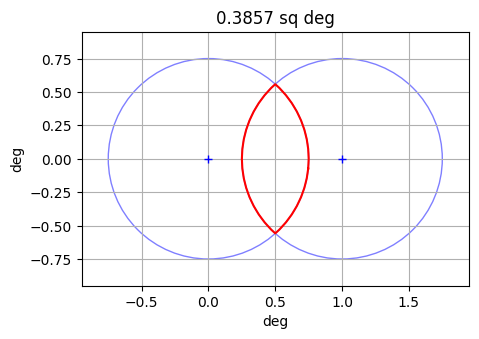

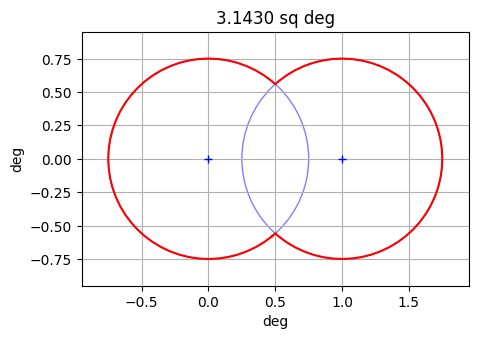

In [3]:
patch_centers = np.array([[0, 0], [1, 0]]) * u.deg
draw_patches(patch_centers, 2)
draw_patches(patch_centers, 1)

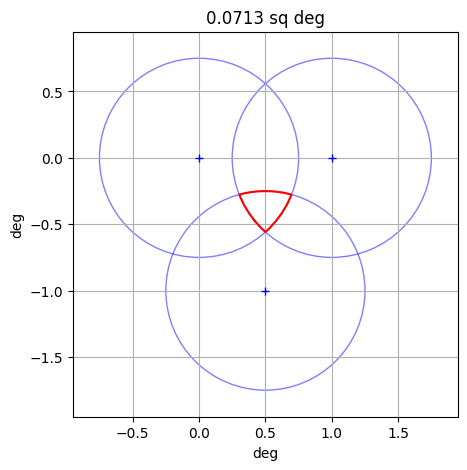

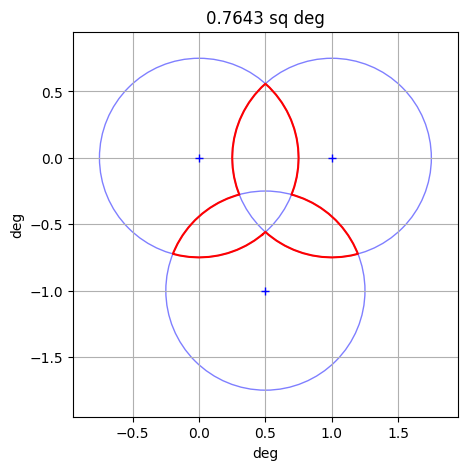

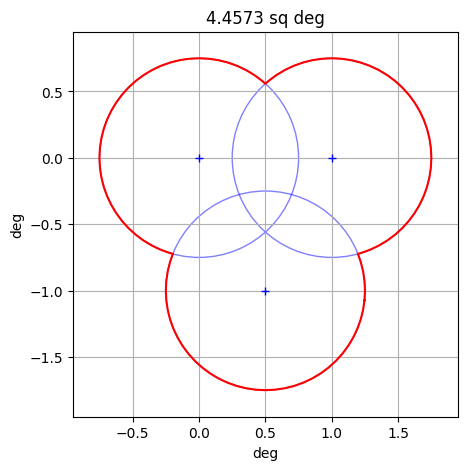

In [4]:
patch_centers = np.array([[1, 0], [0, 0], [0.5, -1]]) * u.deg
draw_patches(patch_centers, 3)
draw_patches(patch_centers, 2)
draw_patches(patch_centers, 1)

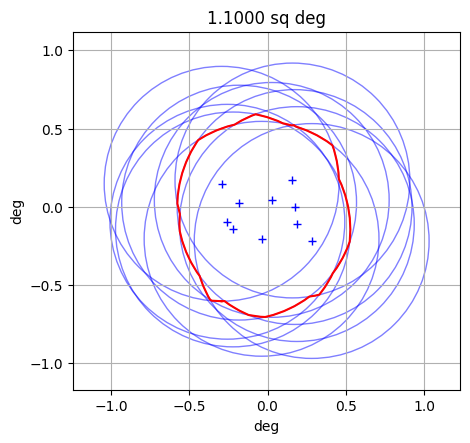

In [5]:
one_patch_rad = 0.75 * u.deg
patch_centers = np.random.normal(0, one_patch_rad.to_value(u.deg) / 4, (10, 2)) * u.deg
draw_patches(patch_centers, 8)

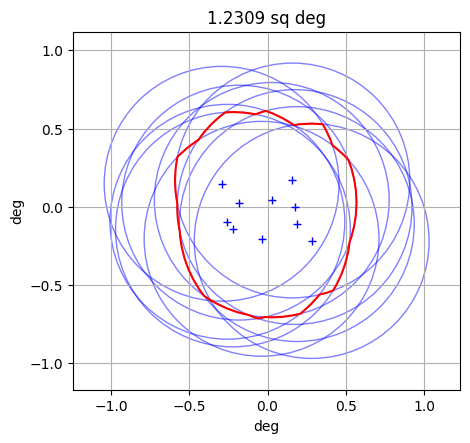

In [6]:
draw_patches(patch_centers, 7)